# **Лабораторная забота №2.**  

## **Статистическое  моделирование  случайных  величин. Интервальное  оценивание  параметров  распределения случайных величин.** 

## **Часть I**

## **Вариант 8**

### 1.  Смоделировать  выборку из   п  независимых наблюдений  над случайной  величиной  X, имеющей нормальный закон распределения с параметрами (a, σ^2).

In [33]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as st
import seaborn as sns
from scipy.stats import t
from scipy import stats
from scipy.stats import chi2
from scipy.stats import norm, skew, kurtosis

In [6]:
n = 14
a = -0.5
sigma = np.sqrt(4)
gamma = 0.95

In [7]:
x = np.random.normal(a, sigma, size=n)

### 1.1.  С надежностью γ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что  дисперсия случайной величины X известна

In [8]:
P_= 1 / 2 + gamma / 2
t_gamma = st.norm.ppf(P_, loc=0, scale=1)
a_left_ = x.mean() - sigma * t_gamma / n **0.5
a_right_= x.mean() + sigma * t_gamma / n**0.5
print('Доверительный интервал для параметра a:')
print(a_left_,a_right_) 

Доверительный интервал для параметра a:
-1.3504047122091303 0.7448849222380642


In [9]:
a_estimate = np.mean(x)
interval_estimate_1 = st.norm.interval(confidence=gamma, 
              loc=a_estimate,
              scale=sigma/np.sqrt(n)) 
print('Доверительный интервал для параметра a:')
print(interval_estimate_1)

Доверительный интервал для параметра a:
(-1.3504047122091303, 0.7448849222380642)


### 1.2. С надежностью  найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна.

In [10]:
interval_for_MX_ = [0]*2 
t_gamma_0 = st.t.ppf(1/2+gamma/2, df=len(x)-1) 
a_estimate = np.mean(x)
sigma_estimate = np.std(x, ddof=1)
interval_for_MX_[0] = a_estimate - sigma_estimate * t_gamma_0 / np.sqrt(n)
interval_for_MX_[1] = a_estimate + sigma_estimate * t_gamma_0 / np.sqrt(n)
print(interval_for_MX_)

[-1.3694580386001032, 0.7639382486290371]


In [11]:
a_estimate=np.mean(x)
sigma_estimate=np.std(x, ddof=1)
interval_estimate_2=st.t.interval(gamma, df=len(x)-1,
              loc=a_estimate,
              scale=sigma_estimate/np.sqrt(n)) 
print(interval_estimate_2) 

(-1.3694580386001032, 0.7639382486290371)


### 1.3. С надежностью γ найти интервальную оценку (доверительный интервал) для дисперсии случайной величины X

In [12]:
variance = np.var(x, ddof=1)
alpha = 1 - gamma
chi2_lower = st.chi2.ppf(alpha / 2, n - 1)
chi2_upper = st.chi2.ppf(1 - alpha / 2, n - 1)
interval_lower = (n - 1) * variance / chi2_upper
interval_upper = (n - 1) * variance / chi2_lower

print(variance) 
print(interval_lower, interval_upper)

3.4131500303527664
1.7938089891472955 8.858686470799842


In [13]:
ci_lower, ci_upper = st.chi2.interval(gamma, n - 1)
interval_lower = (n - 1) * variance / ci_upper
interval_upper = (n - 1) * variance / ci_lower

print(interval_lower, interval_upper)

1.7938089891472955 8.858686470799842


### 2. Построить график зависимости длины доверительного интервала от надежности при неизменном объеме выборки для случаев интервального оценивания  математического ожидания и дисперсии. 

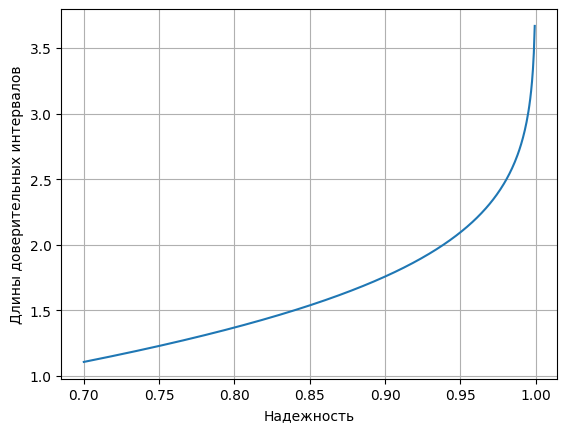

In [14]:
sample = np.random.normal(a, sigma, n)
a_estimate = np.mean(sample) 
V = 500
gamma_ = [0.0] * V 
delta_ = [0.0] * V
gamma__0 = 0.7
gamma__1 = 0.9999999999
h = (gamma__1 - gamma__0) / V
for i in range(V):
    gamma_[i] = gamma__0 + i * h
    interval_estimate_MX=st.norm.interval(confidence=gamma_[i], 
              loc=a_estimate, 
              scale=sigma/np.sqrt(n)) 
    delta_[i] = interval_estimate_MX[1] - interval_estimate_MX[0] 
plt.plot(gamma_,delta_)
plt.xlabel("Надежность")
plt.ylabel("Длины доверительных интервалов")
plt.grid()

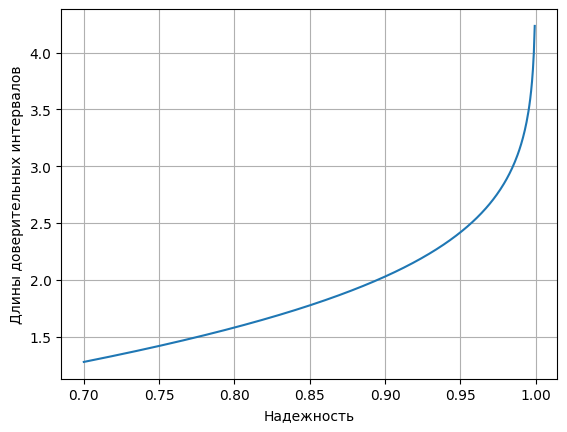

In [15]:
sample = np.random.normal(a, sigma, n)
a_estimate = np.mean(sample) 
V = 500
gamma_ = [0.0] * V 
delta_ = [0.0] * V
gamma__0 = 0.7
gamma__1 = 0.9999999999
h = (gamma__1 - gamma__0) / V
for i in range(V):
    gamma_[i] = gamma__0 + i * h
    interval_estimate_MX=st.norm.interval(confidence=gamma_[i], 
              loc=a_estimate, 
              scale=np.std(sample, ddof=1)/np.sqrt(n)) 
    delta_[i] = interval_estimate_MX[1] - interval_estimate_MX[0] 
plt.plot(gamma_,delta_)
plt.xlabel("Надежность")
plt.ylabel("Длины доверительных интервалов")
plt.grid()

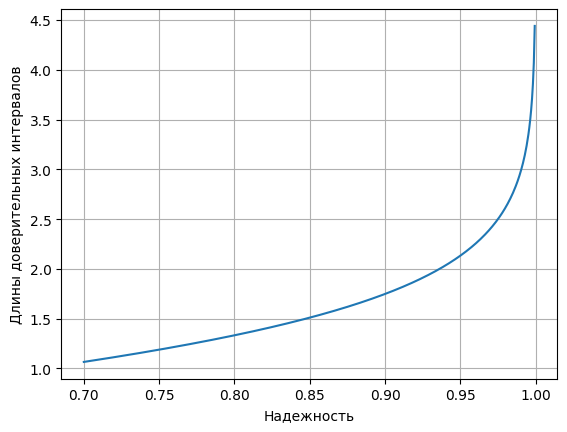

In [16]:
V = 500
gamma_ = [0.0] * V 
delta_ = [0.0] * V
gamma__0 = 0.7
gamma__1 = 0.9999999999
h = (gamma__1 - gamma__0) / V 
for i in range(V):
    gamma_[i] = gamma__0 + i * h
    a_estimate=np.mean(x)
    sigma_estimate=np.std(x, ddof=1)
    interval_estimate_2=st.t.interval(gamma_[i], df=len(x)-1,
              loc=a_estimate,
              scale=sigma_estimate/np.sqrt(n)) 
    delta_[i] = interval_estimate_2[1] - interval_estimate_2[0]
plt.plot(gamma_, delta_)
plt.xlabel("Надежность")
plt.ylabel("Длины доверительных интервалов")
plt.grid()

### 3. Построить график зависимости длины доверительного интервала от объема выборки при неизменной надежности для случаев интервального оценивания математического ожидания и дисперсии.

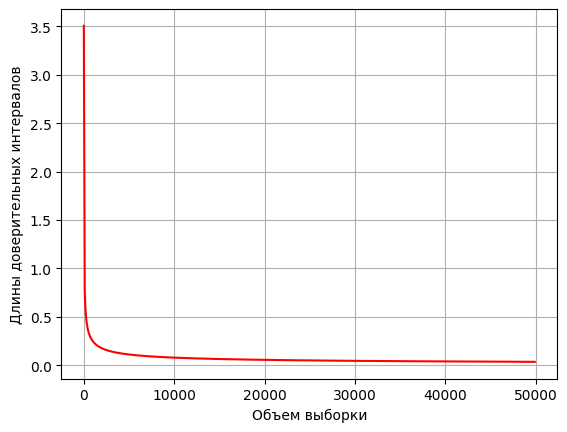

In [17]:
sample = np.random.normal(a, sigma, n)
a_estimate=np.mean(sample)
V=500
n_=[0.0]*V
delta_=[0.0]*V
n__0=5
n__1=50000
h=(n__1-n__0)/V
for i in range(V):
    n_[i]=n__0+i*h
    interval_estimate_MX=st.norm.interval(gamma, 
              loc=a_estimate, 
              scale=sigma/np.sqrt(n_[i])) 
    delta_[i]=interval_estimate_MX[1]-interval_estimate_MX[0]
plt.xlabel("Объем выборки")
plt.ylabel("Длины доверительных интервалов")
plt.plot(n_,delta_, color='red')
plt.grid()

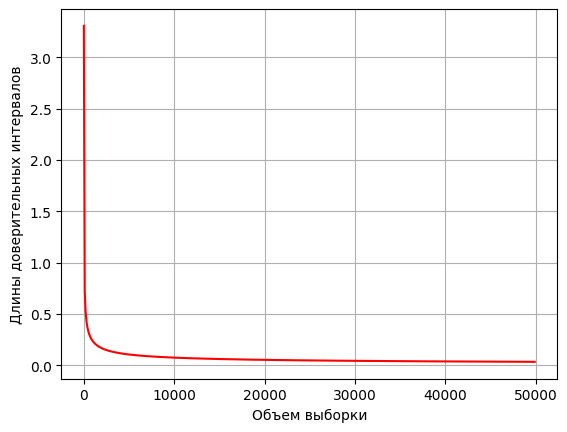

In [18]:
sample = np.random.normal(a, sigma, n)
a_estimate=np.mean(sample)
V=500
n_=[0.0]*V
delta_=[0.0]*V
n__0=5
n__1=50000
h=(n__1-n__0)/V
for i in range(V):
    n_[i]=n__0+i*h
    interval_estimate_MX=st.norm.interval(gamma, 
              loc=a_estimate, 
              scale=np.std(sample, ddof=1)/np.sqrt(n_[i])) 
    delta_[i]=interval_estimate_MX[1]-interval_estimate_MX[0]
plt.xlabel("Объем выборки")
plt.ylabel("Длины доверительных интервалов")
plt.plot(n_,delta_, color='red')
plt.grid()

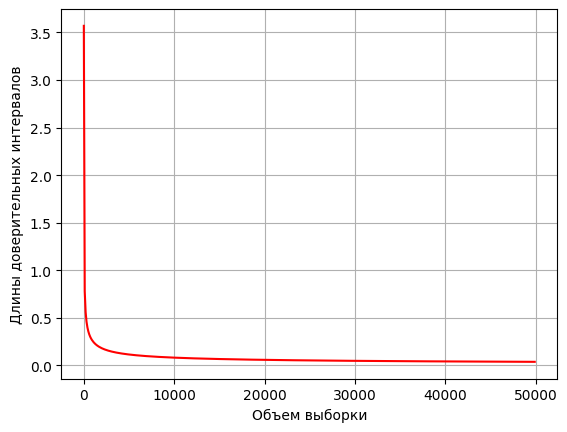

In [19]:
sample = np.random.normal(a, sigma, n)
a_estimate=np.mean(sample)
V=500
n_=[0.0]*V
delta_=[0.0]*V
n__0=5
n__1=50000
h=(n__1-n__0)/V
for i in range(V):
    n_[i] = n__0 + i*h
    a_estimate = np.mean(x)
    sigma_estimate = np.std(x, ddof=1)
    interval_estimate_2 = st.t.interval(gamma, df=len(x)-1,
              loc=a_estimate,
              scale=sigma_estimate/np.sqrt(n_[i])) 
    delta_[i]=interval_estimate_2[1] - interval_estimate_2[0]
plt.xlabel("Объем выборки")
plt.ylabel("Длины доверительных интервалов")
plt.plot(n_, delta_, color='red')
plt.grid()

### 4. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,σ2). По каждой из M выборок с надежностью γ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна.

In [20]:
M=1800 
a = -0.5
sigma = 2

count = 0
confidence_intervals = []
for i in range(M):
    X = np.random.normal(a, sigma, size=n)
    sigma_estimate=np.std(X,ddof=1)
    interval_estimate_2=st.t.interval(confidence=gamma, df=len(X)-1,
              loc=np.mean(X),
              scale=sigma_estimate/np.sqrt(n))
    confidence_intervals.append((interval_estimate_2[0], interval_estimate_2[1]))
    if interval_estimate_2[0] <= a <= interval_estimate_2[1]:
        count += 1
gamma_star = count / M
print(f"Точечная оценка надежности: gamma* = {gamma_star:.4f}")
print(f"Доверительные интервалы для каждой из М выборок: {confidence_intervals}" )

Точечная оценка надежности: gamma* = 0.9511
Доверительные интервалы для каждой из М выборок: [(-1.0897652109291323, 1.4120572561851894), (-0.918786712936918, 0.7380796395809264), (-0.728250466394895, 1.2616882845043762), (-1.0081944749547387, 1.155973777158306), (-2.1995097552554883, 0.06466899287087147), (-0.6887197554390231, 1.6596647515956828), (-2.2370571653608504, 0.6072654851407121), (-2.252519913052489, -0.28615580787924677), (-2.1783447991051452, 0.675237728489975), (-1.354846356684253, 0.18948432737691123), (-1.0713553054420926, 0.9790516205437467), (-1.9099987141785584, 0.23305419772743774), (-2.072407642784402, 0.5842873159166072), (-0.9338254717230587, 1.0003875000308102), (-0.4263816923463152, 1.626909931403202), (-1.9993054622827433, -0.3182431741506725), (-1.7470132089318682, 0.3436348097149238), (-2.0123331736255023, 0.8090511237750091), (-1.3826015740881532, 0.8911356085509183), (-0.9765392378720245, 0.836775729023414), (-1.0170784780211903, 1.288027095270062), (-1.675

### 5. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,σ2).

### 5.1. По каждой из M выборок найти наблюдаемое значение случайной величины Z (описание случайной величины Z приведено в Вашем варианте)

In [21]:
M = 1800
n = 14
a = -0.5
sigma = 2
z_values = []
for _ in range(M):
    X = np.random.normal(a, sigma, size =n)
    x_bar = np.mean(X)
    S2 = np.std(X, ddof=1) 
    Z = ((x_bar - a) / S2) * np.sqrt(n)
    z_values.append(Z)
# z_values = np.array(z_values)
print("Наблюдаемые значения:")
print(z_values)

Наблюдаемые значения:
[-0.5824966790033352, 0.3903391698774005, 0.7347662944402412, -1.9973370094399407, -0.1523803424857486, 0.1944707189146787, 0.24404245303704186, 1.794290153185883, -0.5480464830136584, -0.20675854718598513, -0.3855201802202939, -0.49503297752500136, 0.8557051554403722, 0.07394618443032572, -0.29777576544092055, 0.2733503389037605, 0.1639640917643593, -2.104954691437968, -1.2524537553685693, -0.14675914924493474, -1.0179732585985284, -0.8595717383694953, -0.23528392542269302, -0.29474944561337485, -0.18106091915441488, 1.5365371568756199, -0.8781158060072257, 0.6836972367638007, 0.974384765260584, -0.31503510868238355, 1.0403958410369087, -0.7376559361073721, 1.0568301257158177, -0.6916608446396293, 0.27158061071762796, 0.06538476575568844, -2.165375100488306, -0.7939642153658228, -1.588927026073087, -0.5450190690978343, 0.2822373483960612, 0.25779604600837913, -0.5086113437280835, 0.8171766431789425, -0.2820800955722979, 2.3530252716124034, 0.5000295513731435, -0.

### 5.2. По выборке из M значений случайной величины Z найти выборочные числовые характеристики ее распределения.

In [22]:
mean_z = np.mean(z_values)
median_z = np.median(z_values)
var_z = np.var(z_values)
std_z = np.std(z_values)
skew_z = skew(z_values)
kurtosis_z = kurtosis(z_values)

print("Характеристики:")
print(f"Математическое ожидание: {mean_z}")
print(f"Медиана: {median_z}")
print(f"Дисперсия: {var_z}")
print(f"Стандартное отклонение:{std_z}")
print(f"Асимметрия: {skew_z}")
print(f"Эксцесс: {kurtosis_z}")


Характеристики:
Математическое ожидание: -0.03953946035685315
Медиана: -0.05193864987952864
Дисперсия: 1.240688844399041
Стандартное отклонение:1.1138621298881837
Асимметрия: 0.12485491169055088
Эксцесс: 1.6051656714425615


### 5.3. Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины Z, а также ящичковую диаграмму.

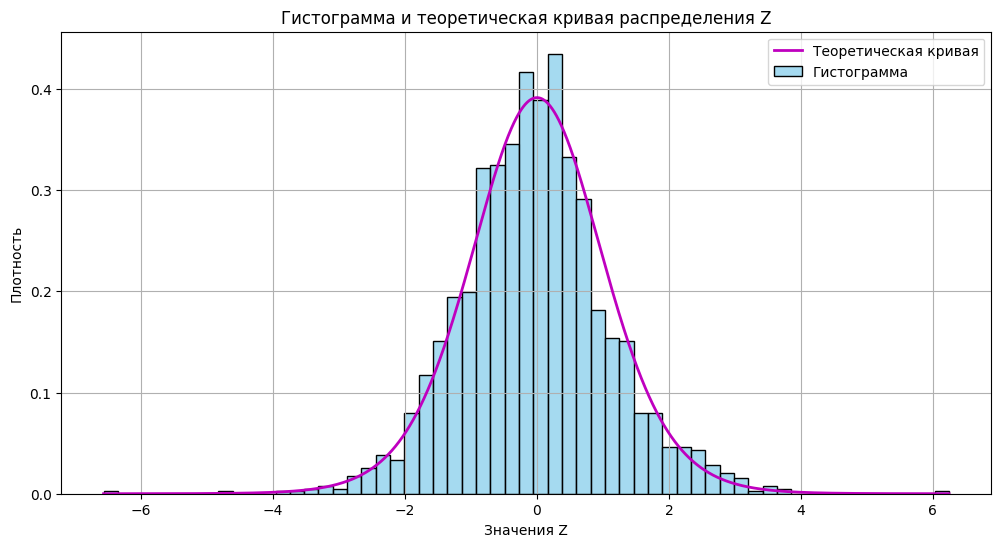

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(z_values, bins='fd', kde=False, stat='density', color='skyblue', label='Гистограмма')

y = np.linspace(min(z_values), max(z_values), 1000000)
p = st.t.pdf(y, n - 1)
# p = norm.pdf(y, np.mean(z_values), np.std(z_values))
plt.plot(y, p, 'm', linewidth=2, label='Теоретическая кривая')

plt.title('Гистограмма и теоретическая кривая распределения Z')
plt.xlabel('Значения Z')
plt.ylabel('Плотность')
plt.legend()
plt.grid()

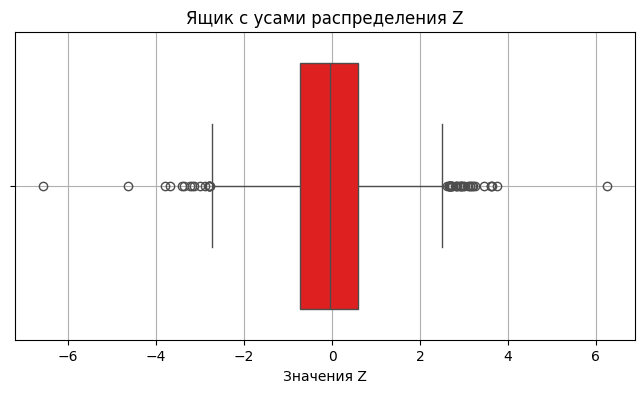

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=z_values, color="red")
plt.title('Ящик с усами распределения Z')
plt.xlabel('Значения Z')
plt.grid()

q1 = np.percentile(z_values, 25)
q3 = np.percentile(z_values, 75)

IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

# Распределение t-Стьюдента

## **Часть II**

### 1. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,sigma2). По каждой из M выборок с надежностью gamma найти интервальную оценку (доверительный интервал) для дисперсии случайной величины X. 

In [25]:
M = 1800
n = 14
a = -0.5
sigma = 2
sigma2 = 4 
gamma = 0.95
count_in_interval = 0
alpha = 1 - gamma
confidence_intervals = []
chi2_lower = chi2.ppf(alpha / 2, df=n-1)
chi2_upper = chi2.ppf(1 - alpha / 2, df=n-1)

for i in range(M):
    X = np.random.normal(a, sigma, size =n)  
    S2 = np.var(X, ddof=1)   
    lower_bound = (n - 1) * S2 / chi2_upper
    upper_bound = (n - 1) * S2 / chi2_lower 
    confidence_intervals.append((lower_bound, upper_bound))
    if lower_bound <= sigma2 <= upper_bound:
            count_in_interval += 1
gamma_star = count_in_interval / M

print(f"Оценка надежности gamma*: {gamma_star}")
print(f"Исходная надежность gamma: {gamma}")
print(f"Доверительные интервалы для каждой из М выборок: {confidence_intervals}" )
print(f"Отклонение: {abs(gamma_star - gamma)}")

Оценка надежности gamma*: 0.9361111111111111
Исходная надежность gamma: 0.95
Доверительные интервалы для каждой из М выборок: [(1.8536124878872298, 9.15402474170782), (3.413092637519758, 16.855483362225527), (2.0102363869139954, 9.927508442428868), (3.5007889488257846, 17.28856967810749), (1.5225624318141588, 7.519141278287272), (1.4549830296172142, 7.185401878179017), (0.692616766722408, 3.420472758211329), (2.082423755240009, 10.284004182511142), (2.363872701476897, 11.673933649546978), (2.825788667907348, 13.955095549849988), (1.6856402759935771, 8.32449764602749), (2.1607281387861708, 10.670708668507976), (2.33797702822766, 11.546048433421308), (3.158649119504077, 15.598919611979348), (1.3754747604690487, 6.792752029459963), (3.9588331843802953, 19.550611120136082), (1.8757464365334218, 9.263332763132446), (1.5855856769689487, 7.830380196464415), (2.309455636753288, 11.405196165252828), (1.2777743927974472, 6.3102608999579255), (1.6829633445144958, 8.311277678449857), (3.3585955617

In [26]:
M = 1800
n = 14
a = -0.5
sigma = 2 
K = 500
sigma2 = 4 
gamma_values = []
gamma=0.95
alpha = 1 - gamma
chi2_lower = chi2.ppf(alpha / 2, df=n-1)
chi2_upper = chi2.ppf(1 - alpha / 2, df=n-1)
def func():
    count_in_interval = 0
    for _ in range(M):
        X = np.random.normal(a, sigma, size =n)  
        S2 = np.var(X, ddof=1)   
        lower_bound = (n - 1) * S2 / chi2_upper
        upper_bound = (n - 1) * S2 / chi2_lower 
        confidence_intervals.append((lower_bound, upper_bound))
        if lower_bound <= sigma2 <= upper_bound:
                count_in_interval += 1
    return count_in_interval / M

for _ in range (K):
    gamma_values.append(func())

gamma_star_values = np.array(gamma_values)

mean_gamma_star = np.mean(gamma_star_values)
var_gamma_star = np.var(gamma_star_values)
std_gamma_star = np.std(gamma_star_values)

print(f"Выборочное среднее оценки gamma*: {mean_gamma_star}")
print(f"Выборочная дисперсия оценки gamma*: {var_gamma_star}")
print(f"Выборочное стандартное отклонение оценки gamma*: {std_gamma_star}")
print(f"Оценка надежности gamma*: {gamma_star}")
print(f"Массив из K значений gamma*: ")
print(f"{gamma_star_values}") 

Выборочное среднее оценки gamma*: 0.9500822222222222
Выборочная дисперсия оценки gamma*: 2.6169782716049367e-05
Выборочное стандартное отклонение оценки gamma*: 0.005115640987799023
Оценка надежности gamma*: 0.9361111111111111
Массив из K значений gamma*: 
[0.95055556 0.95055556 0.94166667 0.955      0.95388889 0.96
 0.95444444 0.94444444 0.94611111 0.95777778 0.96       0.94611111
 0.93944444 0.95055556 0.94277778 0.94277778 0.95055556 0.95722222
 0.95166667 0.94388889 0.95055556 0.94833333 0.94       0.95333333
 0.95222222 0.95277778 0.955      0.95388889 0.94611111 0.94777778
 0.94111111 0.95222222 0.95       0.95722222 0.94277778 0.95888889
 0.95277778 0.945      0.95888889 0.94611111 0.96       0.95333333
 0.94444444 0.94555556 0.94388889 0.94333333 0.94777778 0.95555556
 0.95277778 0.95611111 0.95444444 0.94555556 0.95055556 0.94166667
 0.94888889 0.94777778 0.95333333 0.93833333 0.955      0.94722222
 0.955      0.94944444 0.95055556 0.94555556 0.94       0.95333333
 0.95277778 

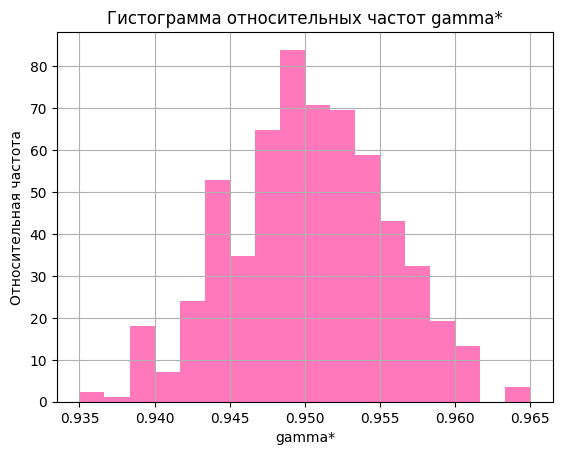

1.0000000000000226


In [27]:
count, bins, ignored = plt.hist(gamma_star_values, bins='fd', density=True, alpha=0.9, color='hotpink')
bin_width = bins[1] - bins[0]
area = np.sum(count * bin_width)
plt.title('Гистограмма относительных частот gamma*')
plt.xlabel('gamma*')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.show()
print(area)

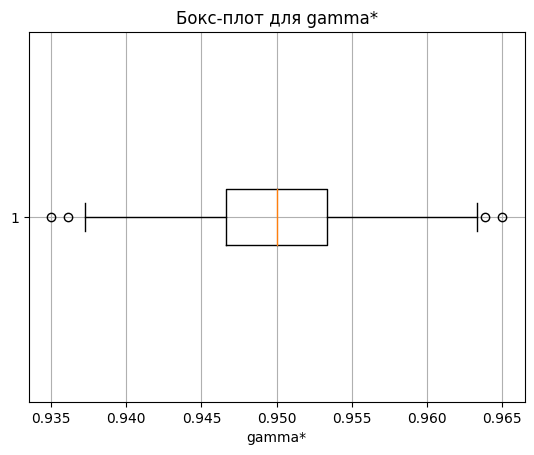

In [28]:
plt.boxplot(gamma_star_values, vert=False)
plt.title('Бокс-плот для gamma*')
plt.xlabel('gamma*')
plt.grid()
plt.show()

In [49]:
M = 1800
n = 14
k = 4
size = 5
gamma=0.95
def gen_w():
    return np.sum(np.random.chisquare(df=k, size = size)) / size

def func(k):
    var_u = 2 * k / size
    alpha = 1 - gamma
    chi2_lower = chi2.ppf(alpha / 2, df=n-1)
    chi2_upper = chi2.ppf(1 - alpha / 2, df=n-1) 
    count_in_interval = 0
    for _ in range(M):
        W = [gen_w() for _ in range(n)]
        S2 = np.var(W, ddof=1)
        lower_bound = (n - 1) * S2 / chi2_upper
        upper_bound = (n - 1) * S2 / chi2_lower

        if lower_bound <= var_u <= upper_bound: 
            count_in_interval += 1
    return count_in_interval/M
  

print(f"Оценка надежности gamma*: {func(k)}")
print(f"Исходная надежность gamma: {gamma}")
print(f"Отклонение: {abs(func(k) - gamma)}")

Оценка надежности gamma*: 0.9233333333333333
Исходная надежность gamma: 0.95
Отклонение: 0.030555555555555558


In [58]:
K = 100 
k = 4
gamma=0.95
gamma_stars = []
for _ in range(K):
    gamma_stars.append(func(k)) 
gamma_stars = np.array(gamma_stars) 

mean_gamma_star = np.mean(gamma_stars)
std_gamma_star = np.std(gamma_stars)
median_gamma_star = np.median(gamma_stars)
var_gamma_star = np.var(gamma_stars, ddof=1)
kurtosis_gamma_star = kurtosis(gamma_stars)
skew_gamma_star = skew(gamma_stars)

print(f"Среднее значение gamma*: {mean_gamma_star}")
print(f"Стандартное отклонение gamma*: {std_gamma_star}")
print(f"Медиана gamma*: {median_gamma_star}")
print(f"Дисперсия: {var_gamma_star}")
print(kurtosis_gamma_star)
print(skew_gamma_star)
print(f"Оценка надежности gamma*: {gamma_star}")
print(f"Массив из K значений gamma*: ")
print(f"{gamma_stars}") 

Среднее значение gamma*: 0.9273999999999998
Стандартное отклонение gamma*: 0.006321568019267223
Медиана gamma*: 0.9277777777777778
Дисперсия: 4.03658810325476e-05
0.08618255201274083
0.304709114072659
Оценка надежности gamma*: 0.9361111111111111
Массив из K значений gamma*: 
[0.92888889 0.92222222 0.93388889 0.93888889 0.92388889 0.93444444
 0.92       0.92722222 0.93722222 0.92222222 0.92444444 0.92777778
 0.92222222 0.93       0.92777778 0.92222222 0.94055556 0.92944444
 0.93111111 0.92277778 0.92222222 0.93444444 0.92111111 0.92611111
 0.92555556 0.92222222 0.92833333 0.91611111 0.935      0.93055556
 0.93       0.92666667 0.92722222 0.92666667 0.93       0.93055556
 0.92777778 0.92833333 0.92888889 0.92       0.92222222 0.92722222
 0.94277778 0.92777778 0.93333333 0.94055556 0.93166667 0.92944444
 0.93611111 0.93       0.91722222 0.92222222 0.915      0.92277778
 0.93055556 0.92444444 0.91944444 0.92722222 0.93444444 0.92277778
 0.92888889 0.92777778 0.92944444 0.925      0.9255555

ShapiroResult(statistic=0.9977844953536987, pvalue=0.20371150970458984)


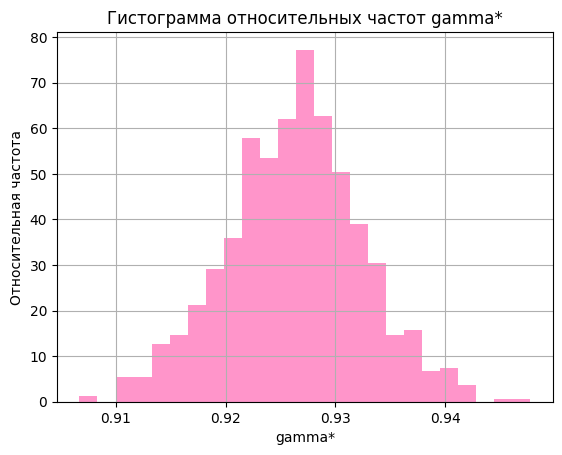

1.0


In [69]:
count, bins, ignored = plt.hist(gamma_stars, bins='fd', density=True, alpha=0.7, color='hotpink')
bin_width = bins[1] - bins[0]
area = np.sum(count * bin_width)
rez=stats.shapiro(gamma_stars)
print(rez)
plt.title('Гистограмма относительных частот gamma*')
plt.xlabel('gamma*')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.show()

print(area)  

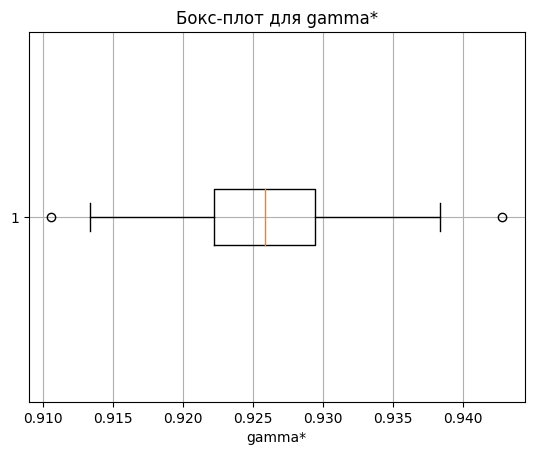

In [41]:
plt.boxplot(gamma_stars, vert=False)
plt.title('Бокс-плот для gamma*')
plt.xlabel('gamma*')
plt.grid()
plt.show()

In [67]:
K = 1000
k = 4
gamma=0.95
gamma_stars = []
for _ in range(K):
    gamma_stars.append(func(k)) 
gamma_stars = np.array(gamma_stars) 

mean_gamma_star = np.mean(gamma_stars)
std_gamma_star = np.std(gamma_stars)
median_gamma_star = np.median(gamma_stars)
var_gamma_star = np.var(gamma_stars, ddof=1)
kurtosis_gamma_star = kurtosis(gamma_stars)
skew_gamma_star = skew(gamma_stars)

print(f"Среднее значение gamma*: {mean_gamma_star}")
print(f"Стандартное отклонение gamma*: {std_gamma_star}")
print(f"Медиана gamma*: {median_gamma_star}")
print(f"Дисперсия: {var_gamma_star}")
print(kurtosis_gamma_star)
print(skew_gamma_star)
print(f"Оценка надежности gamma*: {gamma_star}")
print(f"Массив из K значений gamma*: ")
print(f"{gamma_stars}") 

Среднее значение gamma*: 0.9262216666666667
Стандартное отклонение gamma*: 0.006293868243706392
Медиана gamma*: 0.9266666666666666
Дисперсия: 3.965242989903482e-05
0.0725862068227694
-0.034701775027734555
Оценка надежности gamma*: 0.9361111111111111
Массив из K значений gamma*: 
[0.93277778 0.94277778 0.93277778 0.91722222 0.92333333 0.92277778
 0.91333333 0.91833333 0.92555556 0.93277778 0.93444444 0.92611111
 0.92388889 0.94166667 0.92444444 0.93388889 0.93444444 0.93388889
 0.93888889 0.91833333 0.93222222 0.93444444 0.91833333 0.93111111
 0.925      0.92944444 0.93222222 0.93388889 0.915      0.92444444
 0.92055556 0.92555556 0.91722222 0.92611111 0.91388889 0.93166667
 0.94055556 0.91222222 0.93722222 0.92833333 0.93055556 0.91
 0.91611111 0.93       0.92722222 0.92666667 0.92888889 0.92166667
 0.92666667 0.92722222 0.92833333 0.92       0.92333333 0.93277778
 0.92166667 0.93111111 0.92555556 0.92277778 0.92111111 0.92277778
 0.91722222 0.93777778 0.92444444 0.92611111 0.93055556 

ShapiroResult(statistic=0.9977844953536987, pvalue=0.20371150970458984)


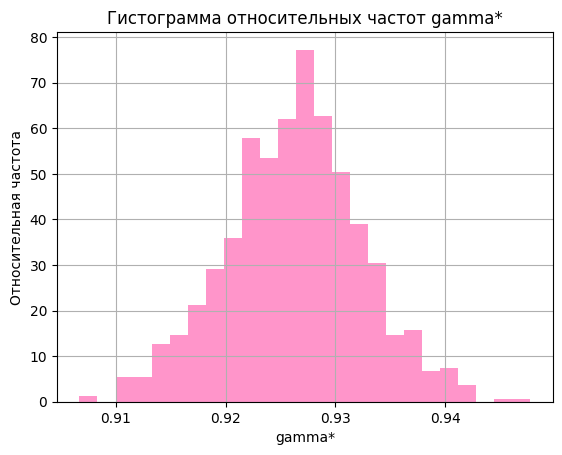

1.0


In [70]:
count, bins, ignored = plt.hist(gamma_stars, bins='fd', density=True, alpha=0.7, color='hotpink')
bin_width = bins[1] - bins[0]
area = np.sum(count * bin_width)
rez=stats.shapiro(gamma_stars)
print(rez)
plt.title('Гистограмма относительных частот gamma*')
plt.xlabel('gamma*')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.show()

print(area)  